# Robust Varibad Analysis
## Longer training over KhazadDum benchmark

In [1]:
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import cross_entropy_sampler as cem
import general_utils as utils
import analysis

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))
np.set_printoptions(precision=4)
np.set_printoptions(linewidth=150)
np.set_printoptions(suppress=True)

## Configuration

In [2]:
ENV_NAME = 'KhazadDum-v0'
TITLE = ENV_NAME[:-3]
ENV_SHORT = 'kd'
TASKS = ('noise',)
METHODS = ('varibad_10M', 'cembad_10M', 'cvrbad_10M')
SEEDS = list(range(10))
ALPHA = 0.01

CEM-related configuration:

In [3]:
TRANSFORMATION = lambda x: x
YLIM = None
SMOOTH = 10

## CEM analysis

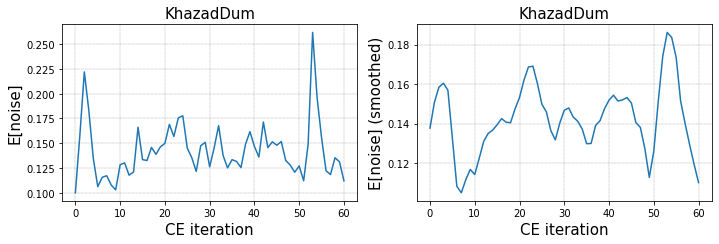

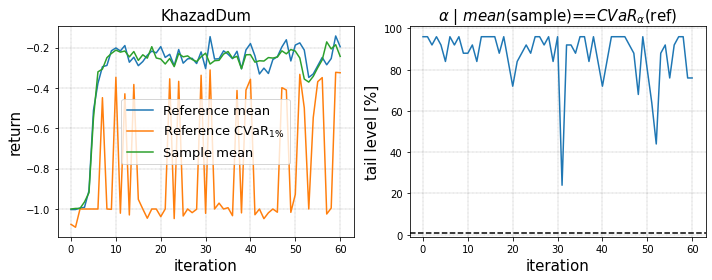

In [4]:
task_dim = len(TASKS)
ce, c1, c2, axs = analysis.cem_analysis(
    ENV_NAME, task_dim, TRANSFORMATION, YLIM, SMOOTH, title=TITLE, tasks=TASKS, seed=20)

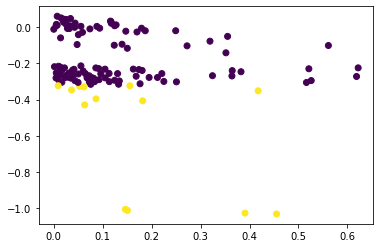

In [5]:
cc = c2[c2.batch==10]
plt.scatter(cc['sample'].values, cc.score.values, c=cc['selected'].values)

## Validation results

In [6]:
%%time
dd, dda, ddm, ddc, dd0, dda0, task_dim = analysis.load_train_data(
    ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA)
dd

kd_varibad_10M_0__19:12_17:00:11
kd_varibad_10M_1__19:12_18:51:38
kd_varibad_10M_2__20:12_16:26:06
kd_varibad_10M_3__19:12_22:34:41
kd_varibad_10M_4__20:12_00:26:08
kd_varibad_10M_5__20:12_02:18:44
kd_varibad_10M_6__20:12_04:10:14
kd_varibad_10M_7__20:12_06:01:05
kd_varibad_10M_8__20:12_07:49:51
kd_varibad_10M_9__20:12_09:38:40
kd_cembad_10M_0__11:12_01:20:52
kd_cembad_10M_1__11:12_03:23:16
kd_cembad_10M_2__11:12_05:27:37
kd_cembad_10M_3__11:12_07:31:41
kd_cembad_10M_4__11:12_09:36:24
kd_cembad_10M_5__11:12_11:31:56
kd_cembad_10M_6__11:12_13:24:01
kd_cembad_10M_7__11:12_15:16:44
kd_cembad_10M_8__11:12_17:09:03
kd_cembad_10M_9__11:12_19:01:28
kd_cvrbad_10M_0__10:12_13:16:31
kd_cvrbad_10M_1__10:12_15:25:51
kd_cvrbad_10M_2__10:12_17:38:03
kd_cvrbad_10M_3__10:12_19:38:50
kd_cvrbad_10M_4__10:12_21:21:56
kd_cvrbad_10M_5__10:12_23:03:57
kd_cvrbad_10M_6__11:12_00:48:03
kd_cvrbad_10M_7__11:12_02:39:09
kd_cvrbad_10M_8__11:12_04:32:14
kd_cvrbad_10M_9__11:12_06:24:44
Task-space dimension: 1
Valida

,iter,task_id,ep,ret,info,task0,method,seed
0,-1,0,0,-0.998789,stay_fall,0.236932,varibad_10M,0
1,-1,0,1,-1.010537,short_fall,0.236932,varibad_10M,0
2,-1,0,2,-0.998092,stay_fall,0.236932,varibad_10M,0
3,-1,0,3,-1.000000,stay_fall,0.236932,varibad_10M,0
4,-1,1,0,0.025817,short_done,0.055232,varibad_10M,0
...,...,...,...,...,...,...,...,...
3010555,4849,254,3,-0.244238,long_done,0.027158,cvrbad_10M,9
3010556,4849,255,0,-0.251705,long_done,0.019162,cvrbad_10M,9
3010557,4849,255,1,-0.216399,long_done,0.019162,cvrbad_10M,9
3010558,4849,255,2,-0.228696,long_done,0.019162,cvrbad_10M,9


CPU times: user 135 ms, sys: 28 ms, total: 163 ms
Wall time: 127 ms


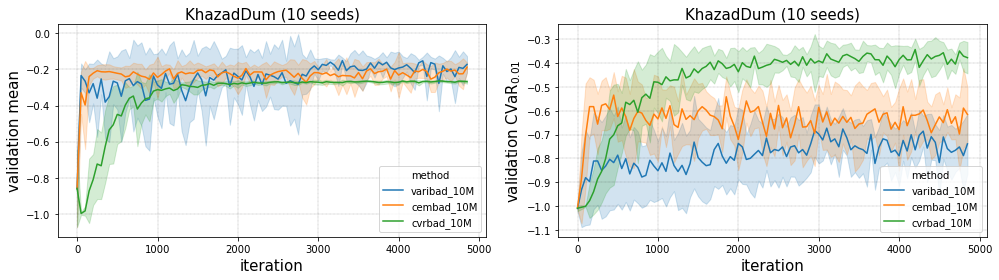

In [7]:
%%time
axs = analysis.show_validation_results_over_seeds(ddm, ddc, ALPHA, TITLE)

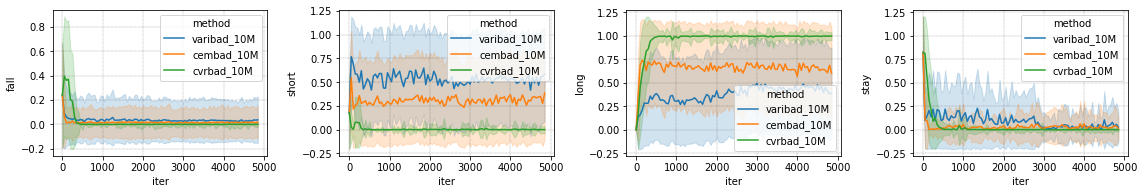

In [8]:
keys = ('fall', 'short', 'long', 'stay')
n = len(keys)
axs = utils.Axes(n, 4, axsize=(4,2.8), fontsize=15)
a = 0

for k in keys:
    dd[k] = [k in p for p in dd['info']]
    sns.lineplot(data=dd, x='iter', y=k, hue='method', ci='sd', ax=axs[a])
    a += 1
plt.tight_layout();

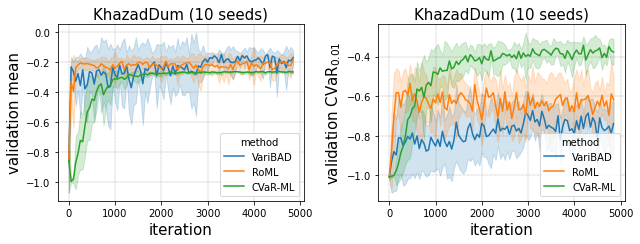

In [9]:
nm_map = dict(varibad_10M='VariBAD', cembad_10M='RoML', cvrbad_10M='CVaR-ML')

dm = ddm[ddm.method.isin(nm_map.keys())].copy()
dc = ddc[ddc.method.isin(nm_map.keys())].copy()
dm['method'] = [nm_map[m] for m in dm.method]
dc['method'] = [nm_map[m] for m in dc.method]

axs = analysis.show_validation_results_over_seeds(dm, dc, ALPHA, TITLE, axsize=(4.5,3.5))
plt.savefig(f'outputs/kd_long_valid', bbox_inches='tight', dpi=300);

## Test results

In [10]:
def summary(model, save=None):
    rr, rra, rrm, rrc, rr0, rra0 = analysis.load_test_data(
        ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA, model)
    
    axs0 = analysis.summarize_test_over_seeds(rrm, rrc, ALPHA, TITLE)
    if save is not None: plt.savefig(f'outputs/{save}_boxplot', bbox_inches='tight')
    axs1 = analysis.summarize_test_over_seeds(rrm, rrc, ALPHA, TITLE, barplot=True)
    if save is not None: plt.savefig(f'outputs/{save}_barplot', bbox_inches='tight')
    
    axs2 = analysis.show_test_vs_tasks(rra, rra0, TITLE, TASKS)
    if save is not None: plt.savefig(f'outputs/{save}_tasks', bbox_inches='tight')
    
    axs3 = utils.Axes(3,3)
    sns.countplot(data=rr, x='info', hue='method', ax=axs3[0])
    axs3[0].set_xticklabels(axs3[0].get_xticklabels(), fontsize=12, rotation=20)
    utils.qplot(rra, 'ret', 'task', 'method', ax=axs3[1]);
    utils.qplot(rra, 'ret', 'task', 'method', ax=axs3[2], q=np.arange(0,0.1,0.001))
    plt.tight_layout()
    
    utils.qplot(rr, 'ret', 'task', 'info', utils.Axes(1,1,(6,4))[0]);
    print(rr.groupby('info').apply(lambda d: (len(d), d.ret.mean()) ))
    
    rr['model'] = [f'{m}_{s}' for m,s in zip(rr.method,rr.seed)]
    rr['episode'] = rr.ep.astype(str)
    rr['fall'] = ['fall' in p for p in rr['info']]
    rr['short'] = ['short' in p for p in rr['info']]
    rr['long'] = ['long' in p for p in rr['info']]
    rr['stay'] = ['stay' in p for p in rr['info']]

    axs4 = utils.Axes(4, 4)
    for a, y in enumerate(('long', 'short', 'fall', 'stay')):
        rr['y'] = 100*rr[y]
        sns.lineplot(data=rr, x='ep', y='y', hue='method', ax=axs4[a])
        axs4.labs(a, 'episode', f'{y} [%]', f'KhazadDum ({len(SEEDS)} seeds)')
    plt.tight_layout()
    
    for y in ('long', 'short', 'fall'):
        axs = utils.compare_quantiles(rr[rr.seed.isin(SEEDS[:4])], x='task0', y=y, hue='episode', fac='method', xbins=6, mean_digits=2, axs_args=dict(W=4,axsize=(5,3.5)))
        for a in range(len(axs)):
            axs[a].set_ylim((-0.02,0.2 if y=='fall' else 1.02))

    return rr

Test tasks: 1008
Test returns vs. task - over all seeds aggregated:
info
long             (2199, -0.5947444537868821)
long_done     (179563, -0.26284620864605973)
short            (2276, -0.7353729141879375)
short_done     (85019, 0.003632234240864999)
short_fall        (4959, -1.021424122156215)
stay             (6715, -0.9981689983397745)
stay_fall         (229, -0.9999545315467635)
dtype: object
CPU times: user 3min 20s, sys: 1min 16s, total: 4min 36s
Wall time: 2min 42s


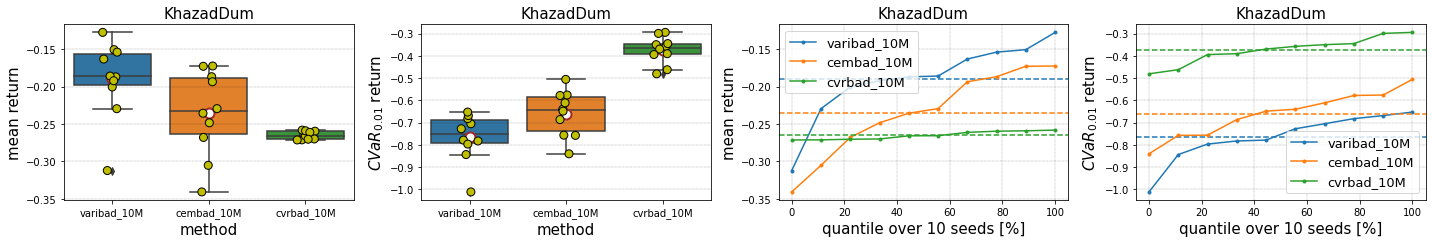

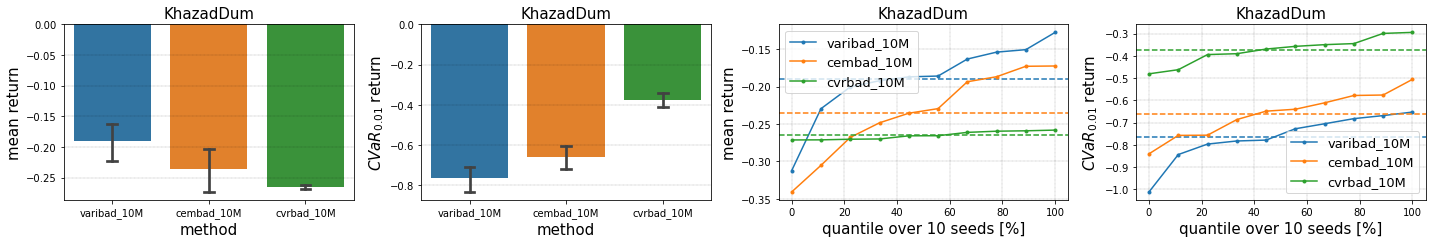

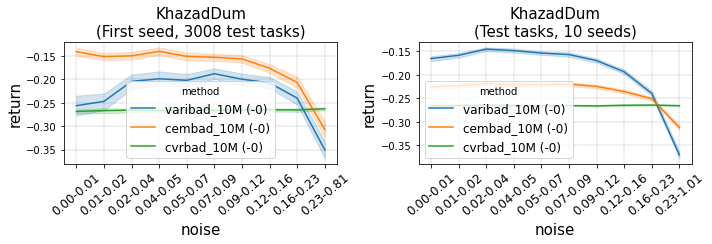

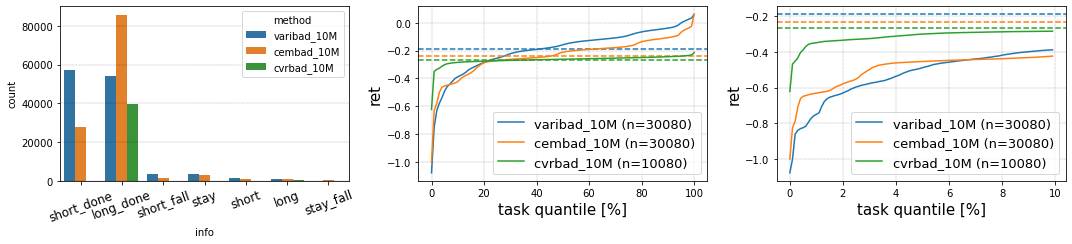

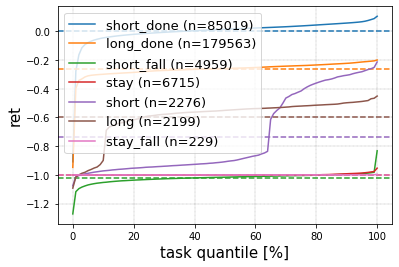

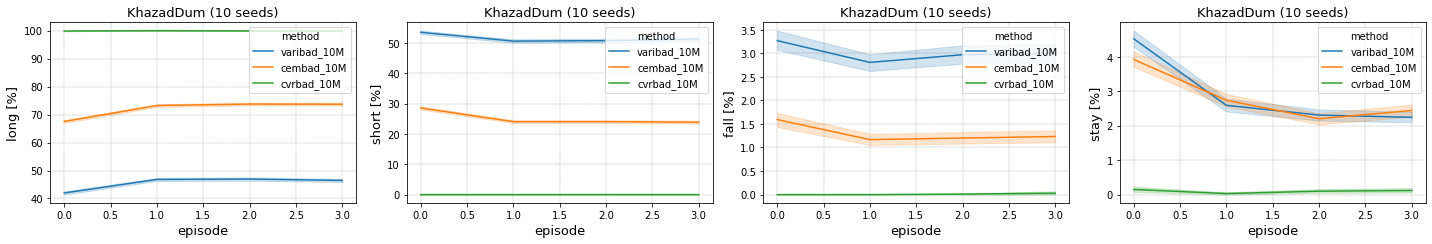

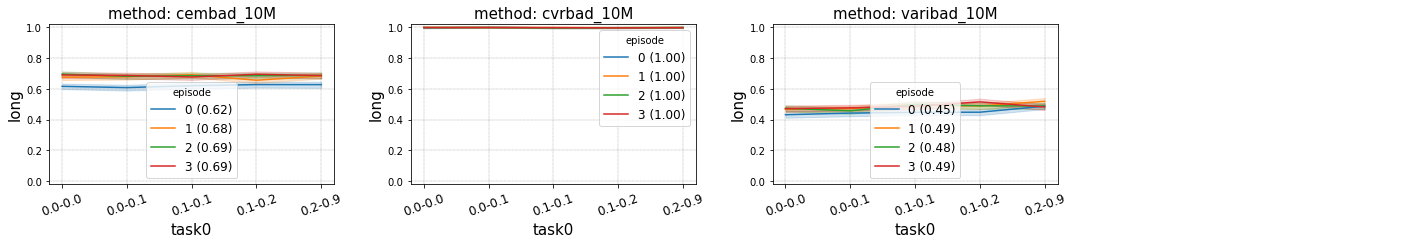

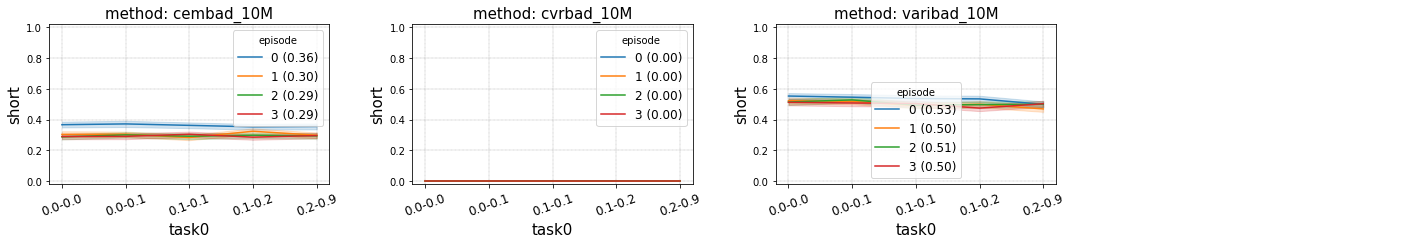

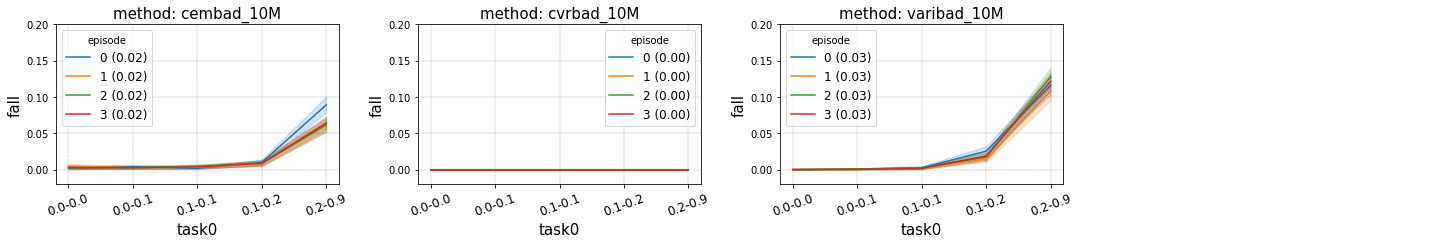

In [11]:
%%time
rr = summary('final')

Test tasks: 1008
Test returns vs. task - over all seeds aggregated:
info
long              (2724, -0.525245575860646)
long_done     (219990, -0.25915173959992704)
long_fall          (32, -0.9999202769249678)
short            (747, -0.43199772552314053)
short_done     (54100, 0.011761742583760051)
short_fall       (2936, -1.0221205969475595)
stay              (347, -0.9967467839848411)
stay_fall          (84, -0.9999526455288842)
dtype: object
CPU times: user 3min 21s, sys: 1min 16s, total: 4min 37s
Wall time: 2min 43s


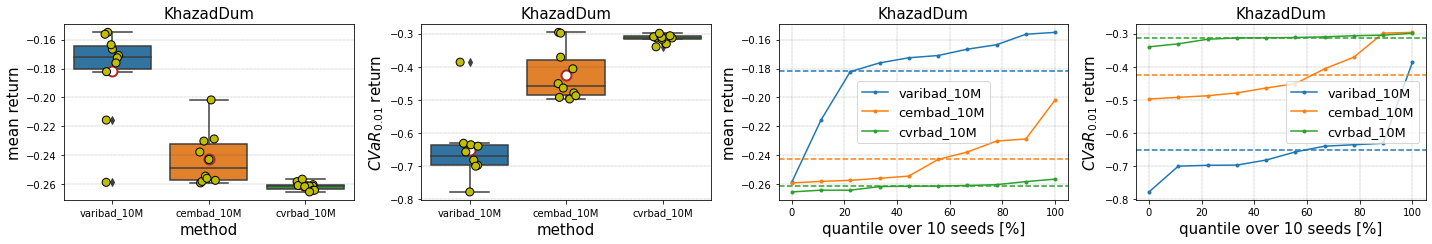

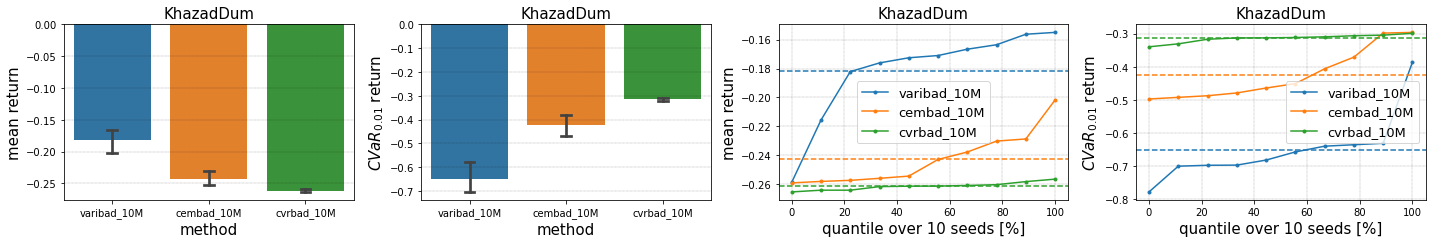

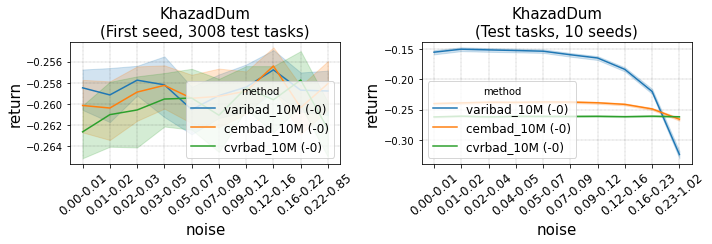

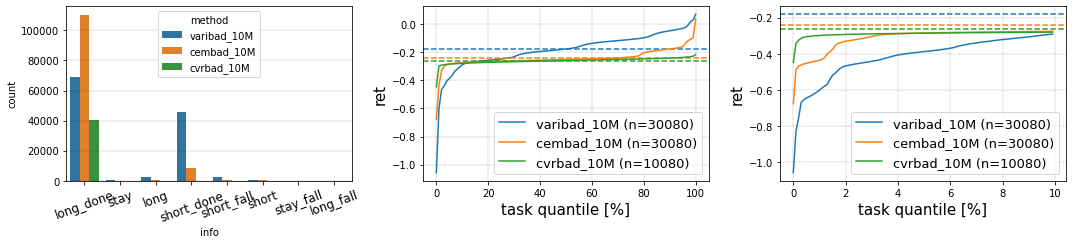

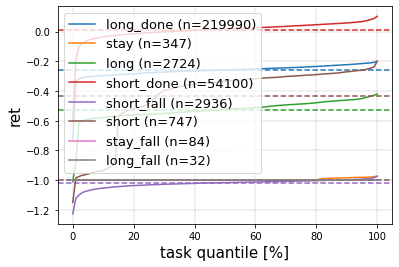

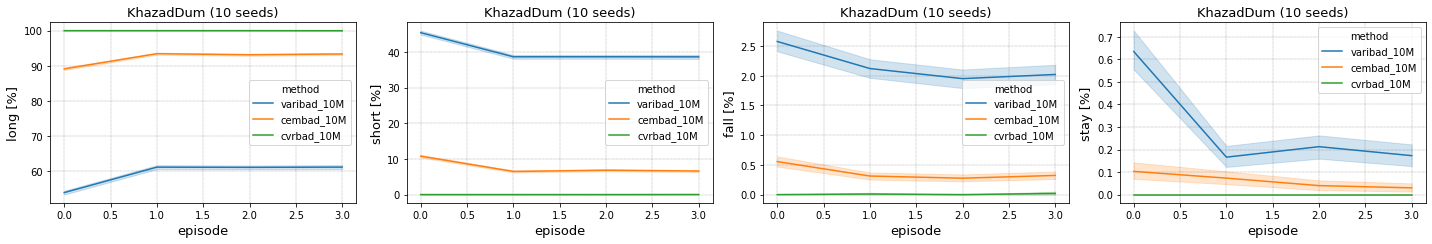

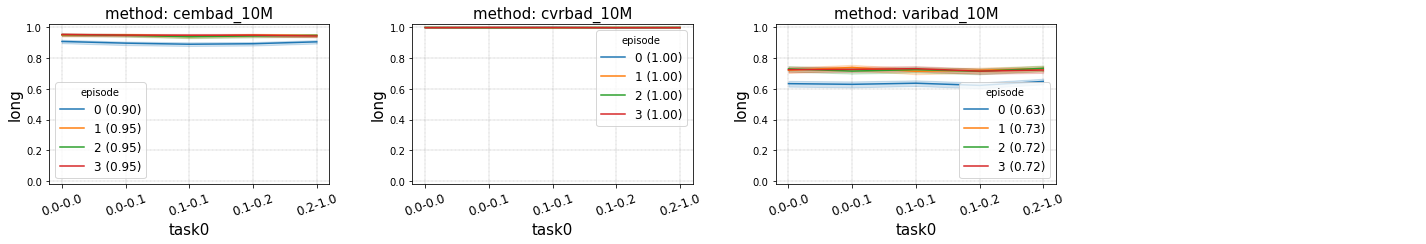

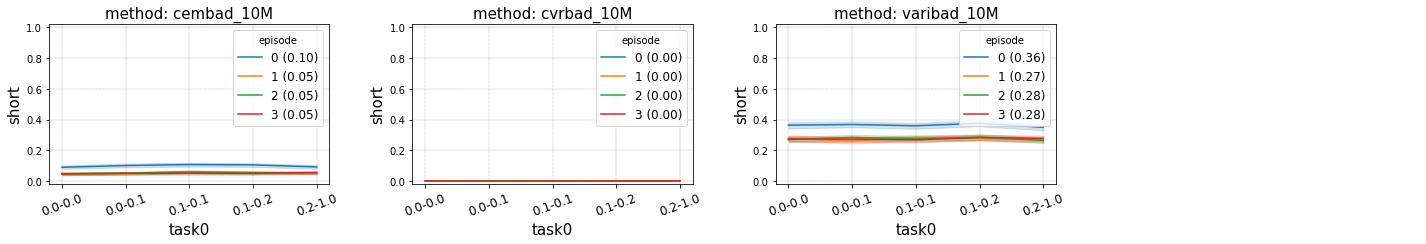

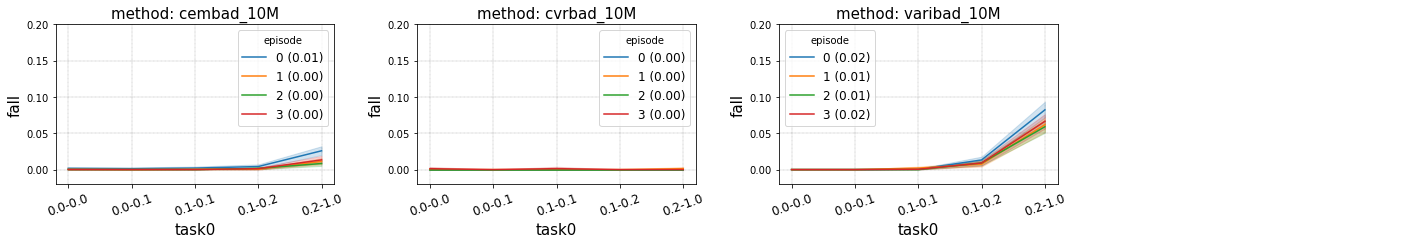

In [12]:
%%time
rr = summary('best_cvar')

Test tasks: 1008
Test returns vs. task - over all seeds aggregated:
info
long              (2724, -0.525245575860646)
long_done     (219990, -0.25915173959992704)
long_fall          (32, -0.9999202769249678)
short            (747, -0.43199772552314053)
short_done     (54100, 0.011761742583760051)
short_fall       (2936, -1.0221205969475595)
stay              (347, -0.9967467839848411)
stay_fall          (84, -0.9999526455288842)
dtype: object
CPU times: user 3min 21s, sys: 1min 18s, total: 4min 39s
Wall time: 2min 45s


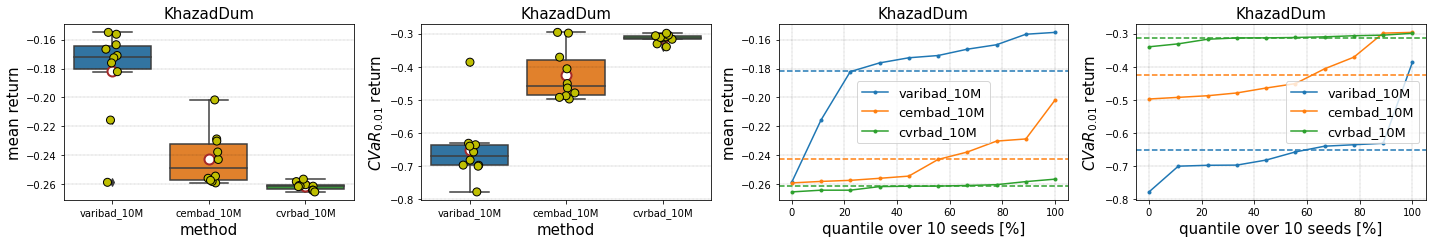

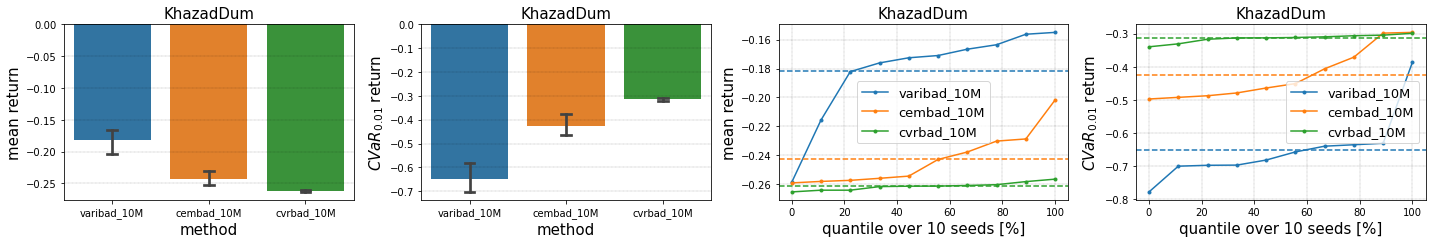

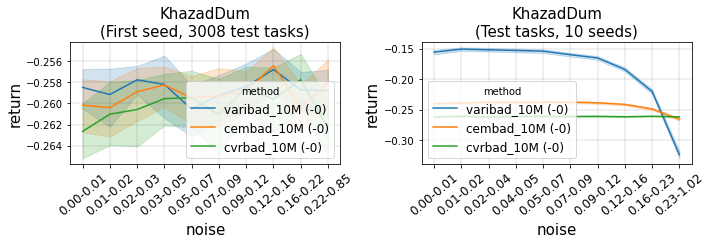

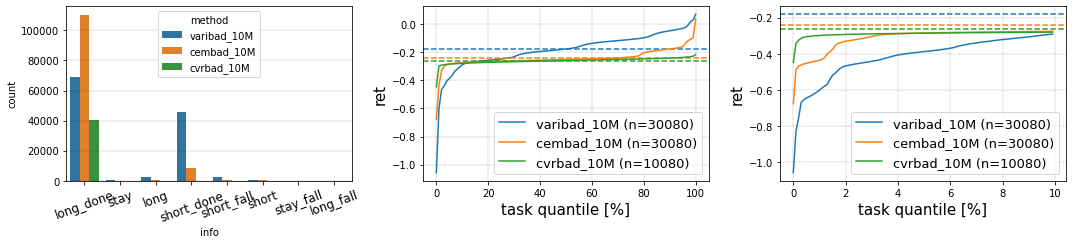

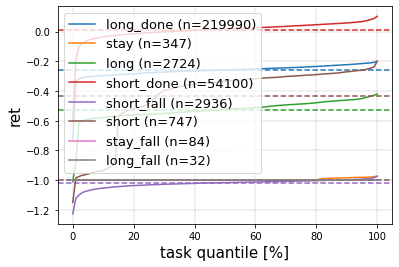

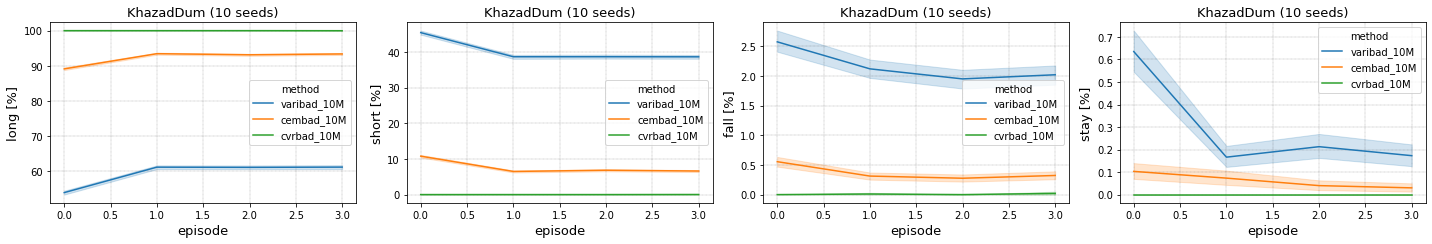

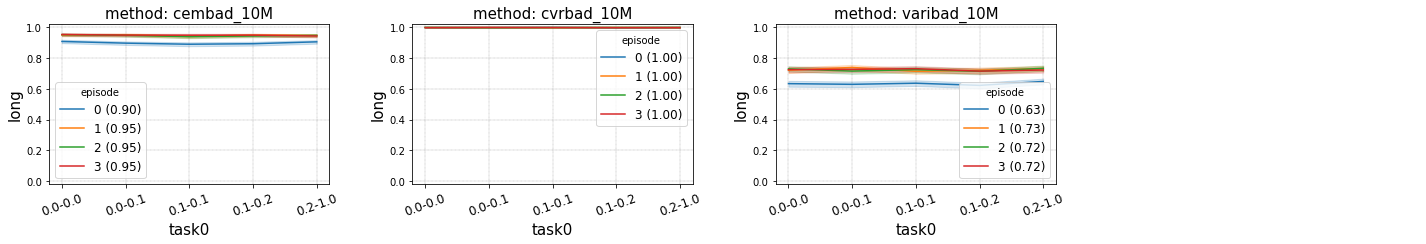

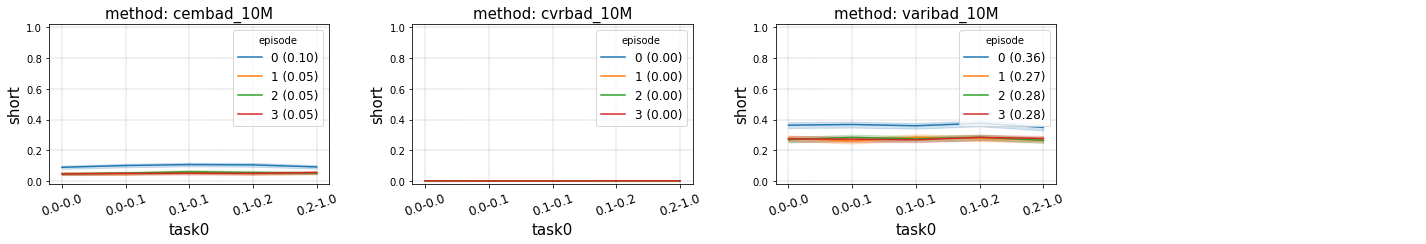

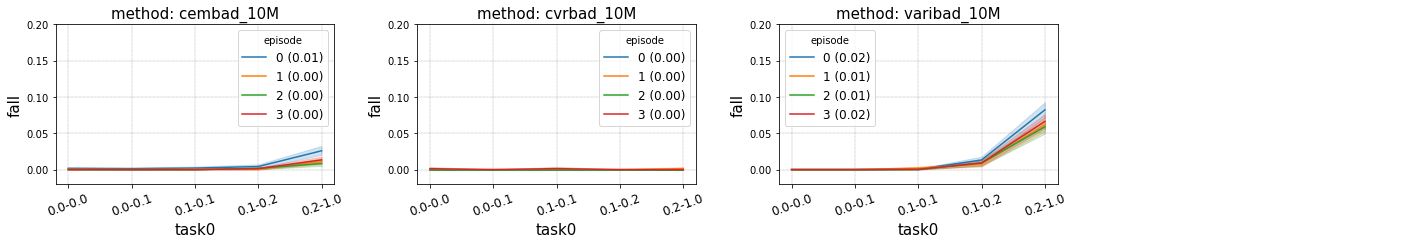

In [13]:
%%time
rr = summary(lambda nm: 'best_mean' if nm=='varibad' else 'best_cvar')  # , save='kd')

In [14]:
# sns.countplot(data=rr[rr.method=='cembad'], x='info', hue='seed', ax=utils.Axes(1,1,(15,7))[0]);

### Nice figures

In [15]:
model = lambda nm: 'best_mean' if nm=='varibad' else 'best_cvar'
nm_map = dict(varibad_10M='VariBAD', cembad_10M='RoML', cvrbad_10M='CVaR-ML')
save = 'kd'
rr, rra, rrm, rrc, rr0, rra0 = analysis.load_test_data(
    ENV_NAME, ENV_SHORT, list(nm_map.keys()), SEEDS, ALPHA, model, nm_map=nm_map)

Test tasks: 1008


Average return for tasks with various ranges of noise in KhazadDum: VariBAD has a large drop under high noise, whereas RoML is robust to the task.
Errors correspond to 0.95 confidence intervals over 30 seeds.

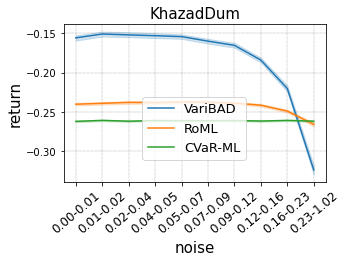

In [16]:
axs = utils.Axes(1,1, fontsize=15)
tit = TITLE  # f'{TITLE}\n(Test tasks, {len(pd.unique(rra.seed))} seeds)'

utils.compare_quantiles(rra, f'task0', 'ret', 'method', mean=None, mean_digits=2,
                        xbins=11, lab_rotation=40, axs=axs, a0=0)
axs.labs(0, TASKS[0], 'return', tit);
plt.legend(loc=(0.3,0.14), fontsize=13);
plt.savefig(f'outputs/{save}_long_tasks', bbox_inches='tight', dpi=300);

Mean and CVaR returns over 1000 test tasks in KhazadDum.
Errors correspond to 0.95 confidence intervals over 30 seeds.

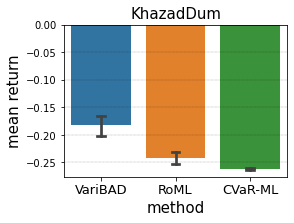

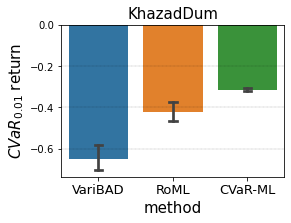

In [17]:
axs = utils.Axes(1,1, (4.0,2.8), fontsize=15)
sns.barplot(data=rrm, x='method', y='ret', ci=95, capsize=0.1, ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=13)
axs.labs(0, 'method', 'mean return', TITLE)
plt.savefig(f'outputs/{save}_long_mean', bbox_inches='tight', dpi=300);

axs = utils.Axes(1,1, (4.0,2.8), fontsize=15)
sns.barplot(data=rrc, x='method', y='ret', ci=95, capsize=0.1, ax=axs[0]);
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=13)
axs.labs(0, 'method', f'$CVaR_{{{ALPHA}}}$ return', TITLE)
plt.savefig(f'outputs/{save}_long_cvar', bbox_inches='tight', dpi=300);